In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import plotly.express as px

In [2]:
# load the dataframe
complete_sales_2022 = pd.read_csv('Ventas_2022.csv', low_memory=False)

In [3]:
# rename columns
sales_columns = complete_sales_2022[['Linea P', 'REFERENCIA INTERNA', 'CANTIDAD', 'COSTO', 'COSTO UNITARIO', 'SUCURSAL', 'FECHA', 'MES', 'Pe o Stock', 'TIPO DE DOCUMENTO', 'SubC']].rename(columns={'REFERENCIA INTERNA':'referencia', 'CANTIDAD':'cantidad'})

# replace special characters
sales_columns['COSTO'] = sales_columns['COSTO'].str.replace("$", "", regex=True)
sales_columns['COSTO'] = sales_columns['COSTO'].str.replace(",", "", regex=True).astype(float)
sales_columns

,Linea P,referencia,cantidad,COSTO,COSTO UNITARIO,SUCURSAL,FECHA,MES,Pe o Stock,TIPO DE DOCUMENTO,SubC
0,AC,INT-IFCH412KF3,4,40173.18,"$10,043.30",TYP LA PAZ,25/08/2022 00:00,8,Stock,FACTURA,EQUIPO AC
1,AC,INT-IFCH416KF3,1,11386.41,"$11,386.41",TYP GUADALAJARA,31/10/2022 00:00,10,Stock,FACTURA,EQUIPO AC
2,AC,INT-IAHWH12KF5,1,57353.04,"$57,353.04",TYP LOS MOCHIS,20/09/2022 00:00,9,Stock,FACTURA,EQUIPO AC
3,AC,INT-ICHS120KC5,1,164868.39,"$164,868.39",TYP MEXICALI,15/11/2022 00:00,11,Pe,FACTURA,EQUIPO AC
4,AC,INT-IFCH406KF1,1,5011.62,"$5,011.62",TYP QUERETARO,29/08/2022 00:00,8,Stock,FACTURA,EQUIPO AC
...,...,...,...,...,...,...,...,...,...,...,...
273874,REFACCIONES,ETA-SILVALOY15PZ,4,202.50,$50.63,TYP TIJUANA,11/04/2022 00:00,4,Stock,FACTURA,QUIMICOS Y SOLVENTES
273875,REFACCIONES,NC-416675,6,474.92,$79.15,TYP TIJUANA,19/04/2022 00:00,4,Stock,FACTURA,QUIMICOS Y SOLVENTES
273876,REFACCIONES,HAR-SILVALOY15T,2,2753.43,"$1,376.72",TYP TIJUANA,02/05/2022 00:00,5,Stock,FACTURA,QUIMICOS Y SOLVENTES
273877,REFACCIONES,HAR-SILVALOY15T,2,2753.43,"$1,376.72",TYP TIJUANA,03/05/2022 00:00,5,Stock,FACTURA,QUIMICOS Y SOLVENTES


In [4]:
# select only the refactions sales of stock inventory
split_days = sales_columns[(sales_columns['Pe o Stock'] == 'Stock') & (sales_columns['TIPO DE DOCUMENTO'] == 'FACTURA') & (sales_columns['Linea P'] == 'REFACCIONES')]

# group by store and subcategory, adding amount of sale
treemap_cat = split_days.groupby(by=['SUCURSAL','SubC'])['COSTO'].sum().reset_index()
treemap_cat

# create the graph
treemap = px.treemap(treemap_cat, path=['SUCURSAL', 'SubC'], values='COSTO')

treemap

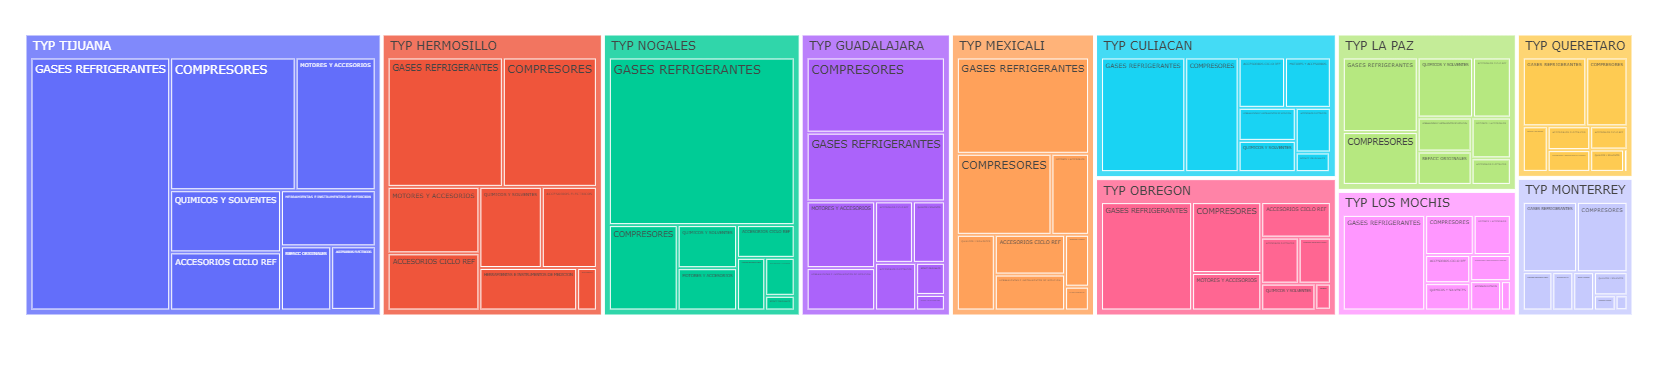